# Anscombe’s quartet

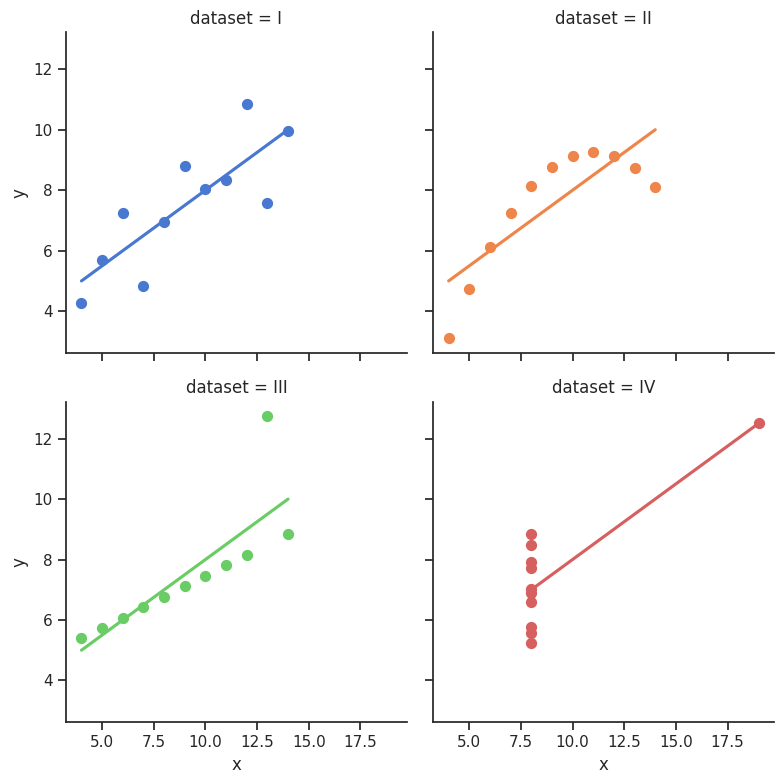

In [1]:
import seaborn as sns
sns.set_theme(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(
    data=df, x="x", y="y", col="dataset", hue="dataset",
    col_wrap=2, palette="muted", ci=None,
    height=4, scatter_kws={"s": 50, "alpha": 1}
)

#Scatterplot with multiple semantics#


<Axes: xlabel='carat', ylabel='price'>

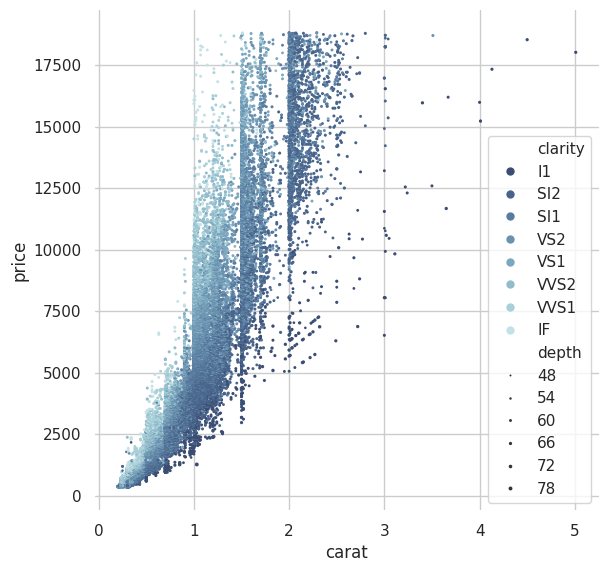

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Load the example diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=diamonds, ax=ax)

# Timeseries plot with error bands

<Axes: xlabel='timepoint', ylabel='signal'>

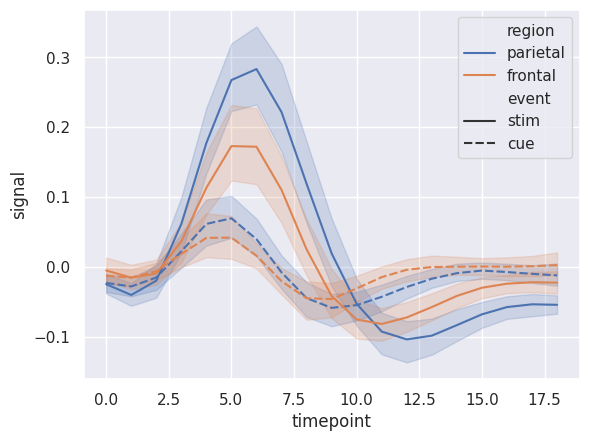

In [3]:
import seaborn as sns
sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

# Facetting histograms by subsets of data

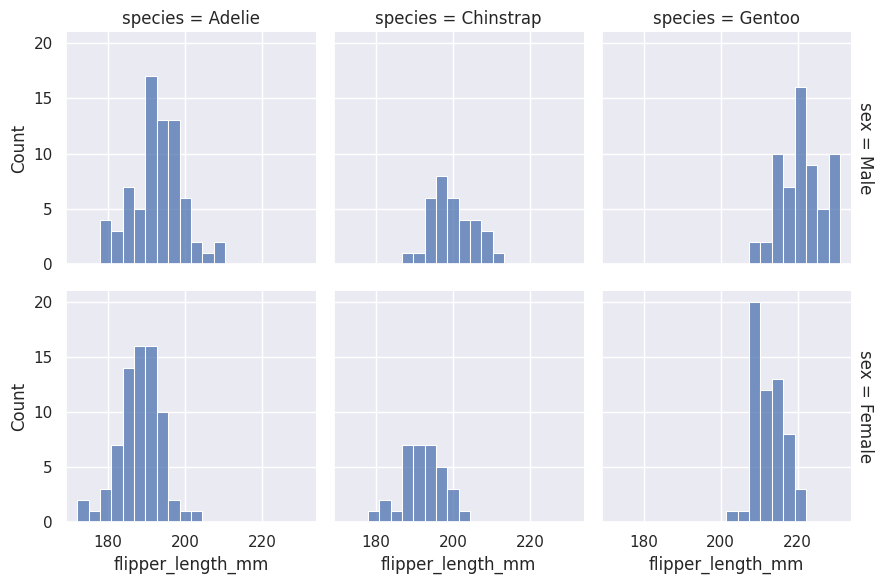

In [4]:
import seaborn as sns

sns.set_theme(style="darkgrid")
df = sns.load_dataset("penguins")
sns.displot(
    df, x="flipper_length_mm", col="species", row="sex",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

# Line plots on multiple facets

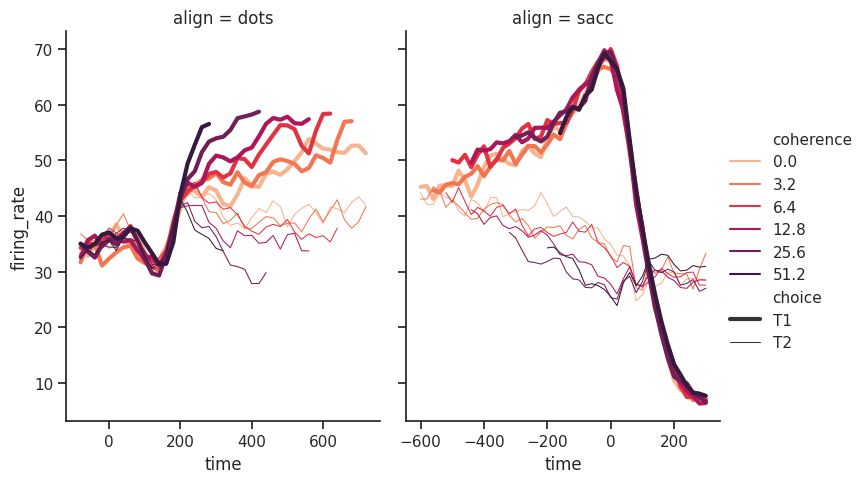

In [5]:
import seaborn as sns
sns.set_theme(style="ticks")

dots = sns.load_dataset("dots")

# Define the palette as a list to specify exact values
palette = sns.color_palette("rocket_r")

# Plot the lines on two facets
sns.relplot(
    data=dots,
    x="time", y="firing_rate",
    hue="coherence", size="choice", col="align",
    kind="line", size_order=["T1", "T2"], palette=palette,
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)

# grouped barplots


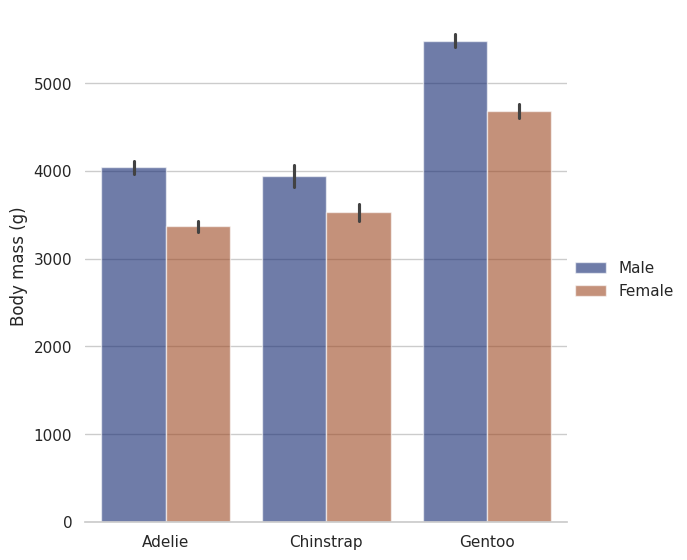

In [6]:
import seaborn as sns
sns.set_theme(style="whitegrid")

penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex",
     palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

# grouped boxplots


In [ ]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

# grouped violinplots with split violins

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=tips, x="day", y="total_bill", hue="smoker",
               split=True, inner="quart", linewidth=1,
               palette={"Yes": "b", "No": ".85"})
sns.despine(left=True)

# Scatterplot heatmap

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the brain networks dataset, select subset, and collapse the multi-index
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns
                  .get_level_values("network")
                  .astype(int)
                  .isin(used_networks))
df = df.loc[:, used_columns]

df.columns = df.columns.map("-".join)

# Compute a correlation matrix and convert to long-form
corr_mat = df.corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

# Hexbin plot with marginal distributions


In [ ]:
import numpy as np
import seaborn as sns
sns.set_theme(style="ticks")

rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)

sns.jointplot(x=x, y=y, kind="hex", color="#4CB391")

# Stacked histogram on a log scale#

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

diamonds = sns.load_dataset("diamonds")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    diamonds,
    x="price", hue="cut",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])

# Horizontal boxplot with observations

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

# Load the example planets dataset
planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="distance", y="method", data=planets,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="distance", y="method", data=planets,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

#Conditional means with observations

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
iris = sns.load_dataset("iris")

# "Melt" the dataset to "long-form" or "tidy" representation
iris = pd.melt(iris, "species", var_name="measurement")

# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(
    data=iris, x="value", y="measurement", hue="species",
    dodge=True, alpha=.25, zorder=1
)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
sns.pointplot(
    data=iris, x="value", y="measurement", hue="species",
    join=False, dodge=.8 - .8 / 3, palette="dark",
    markers="d", scale=.75, errorbar=None
)

# Improve the legend
sns.move_legend(
    ax, loc="lower right", ncol=3, frameon=True, columnspacing=1, handletextpad=0
)

# Joint and marginal histograms

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")

# Load the planets dataset and initialize the figure
planets = sns.load_dataset("planets")
g = sns.JointGrid(data=planets, x="year", y="distance", marginal_ticks=True)

# Set a log scaling on the y axis
g.ax_joint.set(yscale="log")

# Create an inset legend for the histogram colorbar
cax = g.figure.add_axes([.15, .55, .02, .2])

# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, discrete=(True, False),
    cmap="light:#03012d", pmax=.8, cbar=True, cbar_ax=cax
)
g.plot_marginals(sns.histplot, element="step", color="#03012d")

# Joint kernel density estimate

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde",
)

# Overlapping densities (‘ridge plot’)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

# Plotting large distributions

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

diamonds = sns.load_dataset("diamonds")
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]

sns.boxenplot(x="clarity", y="carat",
              color="b", order=clarity_ranking,
              scale="linear", data=diamonds)

# Bivariate plot with multiple elements

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")

# Simulate data from a bivariate Gaussian
n = 10000
mean = [0, 0]
cov = [(2, .4), (.4, .2)]
rng = np.random.RandomState(0)
x, y = rng.multivariate_normal(mean, cov, n).T

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)

# Faceted logistic regression

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")

# Load the example Titanic dataset
df = sns.load_dataset("titanic")

# Make a custom palette with gendered colors
pal = dict(male="#6495ED", female="#F08080")

# Show the survival probability as a function of age and sex
g = sns.lmplot(x="age", y="survived", col="sex", hue="sex", data=df,
               palette=pal, y_jitter=.02, logistic=True, truncate=False)
g.set(xlim=(0, 80), ylim=(-.05, 1.05))

# Plotting on a large number of facets

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Create a dataset with many short random walks
rs = np.random.RandomState(4)
pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(5), 20)
walk = np.repeat(range(20), 5)
df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="walk", hue="walk", palette="tab20c",
                     col_wrap=4, height=1.5)

# Draw a horizontal line to show the starting point
grid.refline(y=0, linestyle=":")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "step", "position", marker="o")

# Adjust the tick positions and labels
grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

# Plotting a diagonal correlation matrix

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Scatterplot with marginal ticks

In [ ]:
import seaborn as sns
sns.set_theme(style="white", color_codes=True)
mpg = sns.load_dataset("mpg")

# Use JointGrid directly to draw a custom plot
g = sns.JointGrid(data=mpg, x="mpg", y="acceleration", space=0, ratio=17)
g.plot_joint(sns.scatterplot, size=mpg["horsepower"], sizes=(30, 120),
             color="g", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6)

# Multiple bivariate KDE plots


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
iris = sns.load_dataset("iris")

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw a contour plot to represent each bivariate density
sns.kdeplot(
    data=iris.query("species != 'versicolor'"),
    x="sepal_width",
    y="sepal_length",
    hue="species",
    thresh=.1,
)

# Conditional kernel density estimate


In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Plot the distribution of clarity ratings, conditional on carat
sns.displot(
    data=diamonds,
    x="carat", hue="cut",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

# Facetted ECDF plots

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")
mpg = sns.load_dataset("mpg")

colors = (250, 70, 50), (350, 70, 50)
cmap = sns.blend_palette(colors, input="husl", as_cmap=True)
sns.displot(
    mpg,
    x="displacement", col="origin", hue="model_year",
    kind="ecdf", aspect=.75, linewidth=2, palette=cmap,
)

# Multiple linear regression

In [ ]:
import seaborn as sns
sns.set_theme()

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")

# Paired density and scatterplot matrix

In [ ]:
import seaborn as sns
sns.set_theme(style="white")

df = sns.load_dataset("penguins")

g = sns.PairGrid(df, diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

# Paired categorical plots

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the example Titanic dataset
titanic = sns.load_dataset("titanic")

# Set up a grid to plot survival probability against several variables
g = sns.PairGrid(titanic, y_vars="survived",
                 x_vars=["class", "sex", "who", "alone"],
                 height=5, aspect=.5)

# Draw a seaborn pointplot onto each Axes
g.map(sns.pointplot, scale=1.3, errwidth=4, color="xkcd:plum")
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)

# Dot plot with several variables

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the dataset
crashes = sns.load_dataset("car_crashes")

# Make the PairGrid
g = sns.PairGrid(crashes.sort_values("total", ascending=False),
                 x_vars=crashes.columns[:-3], y_vars=["abbrev"],
                 height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Total crashes", "Speeding crashes", "Alcohol crashes",
          "Not distracted crashes", "No previous crashes"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

Color palette choices

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", context="talk")
rs = np.random.RandomState(8)

# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 5), sharex=True)

# Generate some sequential data
x = np.array(list("ABCDEFGHIJ"))
y1 = np.arange(1, 11)
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Sequential")

# Center the data to make it diverging
y2 = y1 - 5.5
sns.barplot(x=x, y=y2, palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Diverging")

# Randomly reorder the data to make it qualitative
y3 = rs.choice(y1, len(y1), replace=False)
sns.barplot(x=x, y=y3, palette="deep", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Qualitative")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

# Different cubehelix palettes

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")
rs = np.random.RandomState(50)

# Set up the matplotlib figure
f, axes = plt.subplots(3, 3, figsize=(9, 9), sharex=True, sharey=True)

# Rotate the starting point around the cubehelix hue circle
for ax, s in zip(axes.flat, np.linspace(0, 3, 10)):

    # Create a cubehelix colormap to use with kdeplot
    cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)

    # Generate and plot a random bivariate dataset
    x, y = rs.normal(size=(2, 50))
    sns.kdeplot(
        x=x, y=y,
        cmap=cmap, fill=True,
        clip=(-5, 5), cut=10,
        thresh=0, levels=15,
        ax=ax,
    )
    ax.set_axis_off()

ax.set(xlim=(-3.5, 3.5), ylim=(-3.5, 3.5))
f.subplots_adjust(0, 0, 1, 1, .08, .08)

# Horizontal bar plots

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

# Plotting a three-way ANOVA

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the example exercise dataset
exercise = sns.load_dataset("exercise")

# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.catplot(
    data=exercise, x="time", y="pulse", hue="kind", col="diet",
    capsize=.2, palette="YlGnBu_d", errorbar="se",
    kind="point", height=6, aspect=.75,
)
g.despine(left=True)

# FacetGrid with custom projection

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

# Generate an example radial datast
r = np.linspace(0, 10, num=100)
df = pd.DataFrame({'r': r, 'slow': r, 'medium': 2 * r, 'fast': 4 * r})

# Convert the dataframe to long-form or "tidy" format
df = pd.melt(df, id_vars=['r'], var_name='speed', value_name='theta')

# Set up a grid of axes with a polar projection
g = sns.FacetGrid(df, col="speed", hue="speed",
                  subplot_kws=dict(projection='polar'), height=4.5,
                  sharex=False, sharey=False, despine=False)

# Draw a scatterplot onto each axes in the grid
g.map(sns.scatterplot, "theta", "r")

# Linear regression with marginal distributions#


In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")

tips = sns.load_dataset("tips")
g = sns.jointplot(x="total_bill", y="tip", data=tips,
                  kind="reg", truncate=False,
                  xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)

# Plotting model residuals


In [ ]:
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")

# Make an example dataset with y ~ x
rs = np.random.RandomState(7)
x = rs.normal(2, 1, 75)
y = 2 + 1.5 * x + rs.normal(0, 2, 75)

# Plot the residuals after fitting a linear model
sns.residplot(x=x, y=y, lowess=True, color="g")

# Scatterplot with varying point sizes and hues

In [ ]:
import seaborn as sns
sns.set_theme(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mpg)

# Scatterplot with categorical variables

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid", palette="muted")

# Load the penguins dataset
df = sns.load_dataset("penguins")

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=df, x="body_mass_g", y="sex", hue="species")
ax.set(ylabel="")

# Scatterplot Matrix

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")

df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

# Scatterplot with continuous hues and sizes

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the example planets dataset
planets = sns.load_dataset("planets")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=planets,
    x="distance", y="orbital_period",
    hue="year", size="mass",
    palette=cmap, sizes=(10, 200),
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

# Violinplots with observations

In [ ]:
import numpy as np
import seaborn as sns

sns.set_theme()

# Create a random dataset across several variables
rs = np.random.default_rng(0)
n, p = 40, 8
d = rs.normal(0, 2, (n, p))
d += np.log(np.arange(1, p + 1)) * -5 + 10

# Show each distribution with both violins and points
sns.violinplot(data=d, palette="light:g", inner="points", orient="h")

# Smooth kernel density with marginal histograms

In [ ]:
import seaborn as sns
sns.set_theme(style="white")

df = sns.load_dataset("penguins")

g = sns.JointGrid(data=df, x="body_mass_g", y="bill_depth_mm", space=0)
g.plot_joint(sns.kdeplot,
             fill=True, clip=((2200, 6800), (10, 25)),
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)

# Annotated heatmaps

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Load the example flights dataset and convert to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

# Regression fit over a strip plot

In [ ]:
import seaborn as sns
sns.set_theme()

mpg = sns.load_dataset("mpg")
sns.catplot(
    data=mpg, x="cylinders", y="acceleration", hue="weight", zorder=1
)
sns.regplot(
    data=mpg, x="cylinders", y="acceleration",
    scatter=False, truncate=False, order=2, color=".2",
)

# Discovering structure in heatmap data

In [ ]:
import pandas as pd
import seaborn as sns
sns.set_theme()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
g = sns.clustermap(df.corr(), center=0, cmap="vlag",
                   row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

g.ax_row_dendrogram.remove()

# Trivariate histogram with two categorical variables

In [ ]:
import seaborn as sns
sns.set_theme(style="dark")

diamonds = sns.load_dataset("diamonds")
sns.displot(
    data=diamonds, x="price", y="color", col="clarity",
    log_scale=(True, False), col_wrap=4, height=4, aspect=.7,
)

# Small multiple time series

In [ ]:
import seaborn as sns

sns.set_theme(style="dark")
flights = sns.load_dataset("flights")

# Plot each year's time series in its own facet
g = sns.relplot(
    data=flights,
    x="month", y="passengers", col="year", hue="year",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=flights, x="month", y="passengers", units="year",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "Passengers")
g.tight_layout()

# Lineplot from a wide-form dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")

rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()

sns.lineplot(data=data, palette="tab10", linewidth=2.5)

# Violinplot from a wide-form dataset

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Load the example dataset of brain network correlations
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Pull out a specific subset of networks
used_networks = [1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 16, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Compute the correlation matrix and average over networks
corr_df = df.corr().groupby(level="network").mean()
corr_df.index = corr_df.index.astype(int)
corr_df = corr_df.sort_index().T

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=corr_df, palette="Set3", bw=.2, cut=1, linewidth=1)

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)